In [1]:
%matplotlib inline
import kwant
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
from scipy.linalg import eig
import pickle


In [2]:
def eig_biort(h):
    eigvals, eigvecL, eigvecR = eig(h, left=True, right=True)

    norm = eigvecL.conj().T @ eigvecR
    eigvecR = eigvecR @ np.linalg.inv(norm)
    try:
        assert np.allclose(eigvecL.conj().T @ eigvecR, np.eye(h.shape[0]), atol=1e-5), (np.round(eigvecL.conj().T @ eigvecR, 2), np.round(eigvals))
        assert np.allclose(h @ eigvecR, eigvals * eigvecR, atol=1e-5)
        assert np.allclose(h.T.conj() @ eigvecL, eigvals.conj() * eigvecL, atol=1e-5)
    except AssertionError:
        print('Assertion Error')
    return eigvals, eigvecL, eigvecR


In [3]:
def H(size,t1,t2,d,y,seed):
    
    U = np.array([[0,t1-d,0,t1+d],[t1+d,0,-t1+d,0],[0,-t1-d,0,t1-d],[t1-d,0,t1+d,0]])
    Tm= np.array([[0,0,0,t2],[t2,0,-t2,0],[0,0,0,t2],[0,0,0,0]])
    diagonal = np.eye(size)
    off_diagonal_p = np.eye(size ,k = 1)
    off_diagonal_m = np.eye(size,k = -1)
    np.random.seed(seed)
    rand_disorder=np.random.normal(0,y,size=4*size)
    chiral_disorder=np.zeros((4*size,4*size), float)
    np.fill_diagonal(chiral_disorder,rand_disorder)
    
    hamiltonian = (np.kron(diagonal, U) + np.kron(off_diagonal_p,Tm) + np.kron(off_diagonal_m,Tm.conj().T) 
                 +chiral_disorder)
    return hamiltonian     
              

/Users/albertozorzato/anaconda3/envs/sim/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


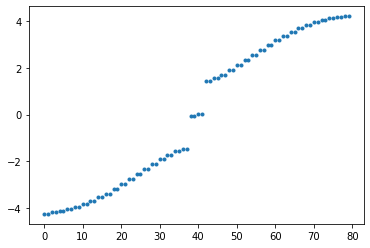

In [7]:
ham = H(20,1,2,0.1,0.1,3)
evals,evecsL,evecsR = eig_biort(ham)
order = np.argsort(evals.real)
plt.plot(evals[order],'.')

/Users/albertozorzato/anaconda3/envs/sim/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


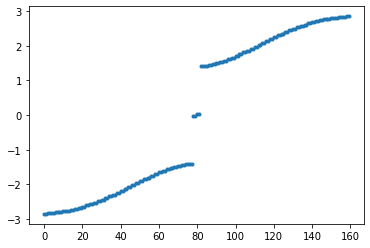

In [8]:
#mean over different seed realizations 
S = []
seeds = np.arange(0,30,1)
for seed in seeds:
    ham = H(40,0.5,1.5,0.1,0.1,seed)
    evals,evecsL,evecsR = eig_biort(ham)
    order = np.argsort(evals.real)
    S.append(evals[order])
S = np.asarray(S)
S = np.mean(S, axis=0)    
plt.plot(S,'.')
#plt.ylim((-0.5,0.5))